In [1]:
import pandas as pd

In [14]:
df1=pd.read_csv('df_cluster3_new.csv')

In [4]:
df1.head()

,고객ID,최초거래년월,최초가맹점업종명,최초거래년월승인건수,최초거래년월승인금액,두번째거래년월,세번째거래년월,네번째거래년월,고객별활동개월수,거래 월 리스트,연속 거래 구간,활성화,거래 연속성 점수,신유지,연속구간,거래월점수,연속구간점수,월평균 거래금액,총거래금액,Cluster
0,2493916545,202212,"편 의 점,일반서적,사우나,서양음식,일반한식",12.5,80000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,684615.38,8900000,3
1,2494188975,202212,서양음식,2.5,10000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,226153.85,2940000,3
2,2494213057,202212,일반한식,2.5,10000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,220769.23,2870000,3
3,2495273114,202212,인터넷P/G,2.5,10000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,648461.54,8430000,3
4,2496557093,202212,정장,2.5,70000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,170000.00,2210000,3


In [24]:
df=pd.read_csv('df_4.csv')

In [25]:
category_mapping = {
    '주유소': [
        'SK주유소', 'GS주유소', '쌍용S-OIL', '현대정유(오일뱅크)', 'E1가스충전소', '쌍용S-OIL가스충전소',
        'GS가스충전소', '전기차충전소', '현대정유가스충전소', '유류판매', '윤활유전문판매','SK가스충전소','LPG취급점'
    ],
    '의류판매': ['정장', '스포츠의류', '아동의류', '맞춤복점', '단체복', '내의판매','기타의류'],
    '도서/서적': ['일반서적', '전문서적', '기타서적문구'],
    '교육': [
        '보습학원', '예·체능계학원', '외국어학원', '독서실', '학원', '기타 교육기관',
        '초중고교육기관', '학습지교육', '기능학원', '유아원'
    ],
    '여행/숙박': [
        '특급호텔', '콘도', '1급 호텔', '2급 호텔', '기타숙박업', '관광여행', '여객선', '항공사'
    ],
    '대중교통': ['택시', '철도', '고속버스'],
    '스포츠/레저': [
        '기타레져업소', '스포츠·레져용품', '스크린골프', '헬스클럽', '골프연습장', '볼 링 장',
        '종합레져타운', '레져업소', '당구장', '수 영 장', '골프경기장', '골프용품 전문점'
    ],
    '보험': ['생명보험', '손해보험', '기타보험'],
    '뷰티/헤어/잡화': [
        '미용원', '피부미용실', '이용원', '화장품', '미용재료', '신 발', '기타잡화',
        '안경', '액세서리', '가 방', '귀금속', '시 계'
    ],
    '홈데코/가전': [
        '조명기구', '일반가구', '주방용구', '주방용식기', '인테리어전문', '기타가구', '카페트,커튼,천막,지물', '침구·수예점', '가전제품', '안마/스포츠마사지', '냉열기기'
    ],
    '문구/사무': [
        '완구점', '문구용품', '사무서비스', '기타 사무용품', '사무·통신기기수리', '사무용 OA기기'
    ],
    '자동차/공구': [
        '자동차정비', '기계공구', '주차장', '가정용품수리', '자동차부품', '자동차시트·타이어',
        '세차장', '이륜차판매', '가타자동차서비스', '기타수리서비스', '보일러·펌프·샷시', '렌터카', '카인테리어'
    ],
    '건축/자재/농업': [
        '옷감·직물', '건축용 요업제품', '페인트', '기타전기제품', '목재·석재·철물',
        '기타건축자재', '비료,사료,종자', '기타농업관련', '농기계'
    ],
    '문화/여가/반려': [
        '문화취미기타', '화방·표구점', '영화관', '사우나', '화원', '티켓', '수족관',
        '민예·공예품', '동물병원', '애완동물'
    ],
    '술/유흥': ['주점', '노 래 방', '유흥주점', '단란주점', '칵테일바', '주류판매점'],
    '통신': [
        '이동통신요금', '통신판매업1', '일반(통신판매)', '통신서비스/소득공제비대상', '통신기기'
    ],
    '컴퓨터': ['소프트웨어', '컴퓨터'],
    '생활': [
        '편 의 점', '슈퍼마켓', '대형할인점', '정수기', '세탁소', '농협하나로클럽',
        '구내매점(국가기관등)', '기념품점', '조세서비스', '공공요금대행서비스/소득공제비대상',
        '공공요금대행서비스/소득공제대상', '자사카드발행백화점'
    ],
    '의료/건강': [
        '약 국', '의 원', '종합병원', '병 원(응급실운영)', '치과의원', '한 의 원',
        '치과병원', '의료용품', '한약방', '한방병원', '건강진단', '기타의료기관 및 기타의료기기'
    ],
    '식료품': [
        '농·축·수산품', '기타음료식품', '농,축협직영매장', '기타건강식품', '인삼제품', '홍삼제품',
        '농축수산가공품', '스넥', '제과점', '미곡상', '정육점'
    ],
    '기타': ['기타1', '기타4', '화물운송','DP&E'],
    '인터넷/상품권': [
        '인터넷P/G', '인터넷종합Mall', '인터넷Mall', 'PG상품권', '전자상거래상품권',
        '상품권전문판매', '상 품 권', 'CATV홈쇼핑'
    ],
    '음식점': ['일반한식', '서양음식', '중국식', '일식·회집', '갈비전문점','한정식'],
    '기타 서비스업': [
        '기타 전문점', '연 쇄 점', '위탁급식업', '업종미등록', '기타유통업', '출판 및 인쇄물',
        '가례서비스업', '보관및 창고업', '혼례서비스업', '부동산중개·임대','종합용역', '기타용역서비스', '기타대인서비스'
    ],
    '비영리' : ['비영리/비대상','비영리/대상'],
    '비씨카드 정산': ['비씨카드 정산용가맹점','비씨카드 정산용(할인)']

}
reverse_mapping = {item: category for category, items in category_mapping.items() for item in items}
def classify_category(업종명):
    return reverse_mapping.get(업종명, 업종명)  # 매핑되지 않은 값은 그대로 반환
df['대분류'] = df['가맹점업종명'].apply(classify_category)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # 진행률 표시를 위한 tqdm 라이브러리

Monte Carlo Simulation 진행 중: 100%|██████████| 50000/50000 [00:39<00:00, 1272.20it/s]


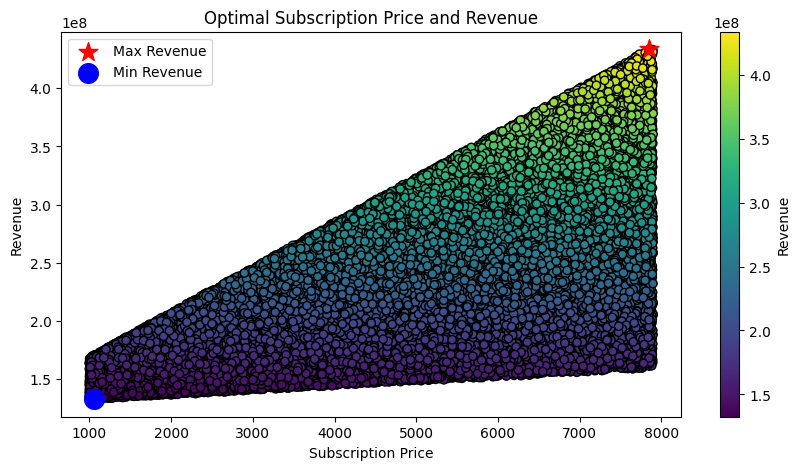

최적 구독 가격: 7855원
최적 할인율: 0.78%
최적 구독률: 29.98%
최대 수익: 433602632원
최소 수익: 132583774원
최대 손해: 132583774원


In [34]:
df['거래년월'] = pd.to_datetime(df['거래년월'], format='%Y%m')  
monthly_avg = df.groupby(['거래년월', '고객ID'])['승인금액'].mean().reset_index()
customer_monthly_avg = monthly_avg.groupby('고객ID')['승인금액'].mean()  

unique_customers = df['고객ID'].nunique()
np.random.seed(42)

num_simulations = 50000  
subscription_prices = np.random.uniform(1000, 7900, num_simulations) 
discount_rates = np.random.uniform(0.005, 0.017, num_simulations) 
conversion_rates = np.random.uniform(0.03, 0.30, num_simulations)  
merchant_fee_rate = 0.0166 

results = []


for i in tqdm(range(num_simulations), desc="Monte Carlo Simulation 진행 중"):
    sub_price = subscription_prices[i]
    discount_rate = discount_rates[i]
    conversion_rate = conversion_rates[i]

    discounted_revenue = customer_monthly_avg * (1 - discount_rate)

    net_revenue = discounted_revenue * merchant_fee_rate

    subscribed_customers = unique_customers * conversion_rate  
 
    subscription_revenue = subscribed_customers * sub_price  
    purchase_revenue = net_revenue.sum()  
    total_revenue = subscription_revenue + purchase_revenue 

    results.append({
        'subscription_price': sub_price,
        'discount_rate': discount_rate,
        'conversion_rate': conversion_rate,
        'total_revenue': total_revenue
    })


results_df = pd.DataFrame(results)


max_revenue_row = results_df.loc[results_df['total_revenue'].idxmax()]
min_revenue_row = results_df.loc[results_df['total_revenue'].idxmin()] 
max_loss = min(results_df['total_revenue']) 
min_loss = 0 if max_loss > 0 else max_loss 

plt.figure(figsize=(10, 5))
plt.scatter(results_df['subscription_price'], results_df['total_revenue'], c=results_df['total_revenue'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Revenue')
plt.scatter(max_revenue_row['subscription_price'], max_revenue_row['total_revenue'], c='r', marker='*', s=200, label='Max Revenue')
plt.scatter(min_revenue_row['subscription_price'], min_revenue_row['total_revenue'], c='b', marker='o', s=200, label='Min Revenue')
plt.xlabel('Subscription Price')
plt.ylabel('Revenue')
plt.legend()
plt.title('Optimal Subscription Price and Revenue')
plt.show()

print(f"최적 구독 가격: {int(max_revenue_row['subscription_price'])}원")
print(f"최적 할인율: {max_revenue_row['discount_rate']:.2%}")
print(f"최적 구독률: {max_revenue_row['conversion_rate']:.2%}")
print(f"최대 수익: {int(max_revenue_row['total_revenue'])}원")
print(f"최소 수익: {int(min_revenue_row['total_revenue'])}원")
print(f"최대 손해: {int(max_loss)}원")

구독률에 따른 구독 수익, 할인 손실, 실제 수익:
     구독률        구독 수익       할인 손실        실제 수익
0   0.00            0  9344784946  -9344784946
1   0.01   2086202658  9344784946  -7258582287
2   0.02   4172405317  9344784946  -5172379628
3   0.03   6258607976  9344784946  -3086176970
4   0.04   8344810634  9344784946   -999974311
5   0.05  10431013293  9344784946   1086228347
6   0.06  12517215952  9344784946   3172431005
7   0.07  14603418610  9344784946   5258633664
8   0.08  16689621269  9344784946   7344836323
9   0.09  18775823928  9344784946   9431038981
10  0.10  20862026586  9344784946  11517241640
11  0.11  22948229245  9344784946  13603444299
12  0.12  25034431904  9344784946  15689646957
13  0.13  27120634562  9344784946  17775849616
14  0.14  29206837221  9344784946  19862052275
15  0.15  31293039880  9344784946  21948254933
16  0.16  33379242538  9344784946  24034457592
17  0.17  35465445197  9344784946  26120660251
18  0.18  37551647856  9344784946  28206862910
19  0.19  39637850515  93447849

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

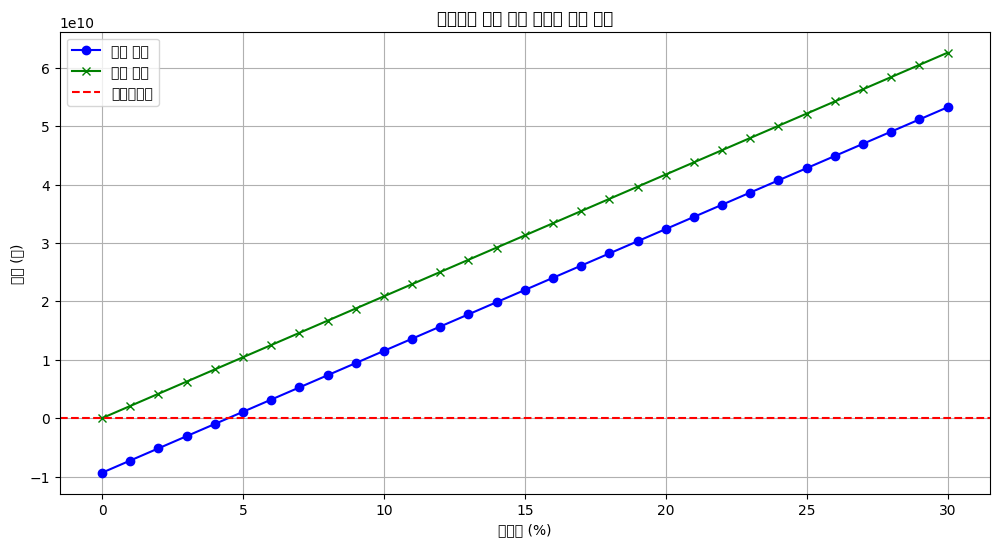

In [41]:
fixed_cost = 0  

conversion_rate_range = np.linspace(0, 0.3, 31) 

fixed_subscription_price = max_revenue_row['subscription_price']
fixed_discount_rate = max_revenue_row['discount_rate']

conversion_rate_results = []

for conversion_rate in conversion_rate_range:
    subscribed_customers = len(df) * conversion_rate
    total_discount_loss = df['승인금액'].sum() * fixed_discount_rate
    subscription_revenue = subscribed_customers * fixed_subscription_price  
    actual_revenue = subscription_revenue - total_discount_loss - fixed_cost
    conversion_rate_results.append({
        '구독률': conversion_rate,
        '구독 수익': subscription_revenue,
        '할인 손실': total_discount_loss,
        '실제 수익': actual_revenue
    })

conversion_rate_df = pd.DataFrame(conversion_rate_results)


conversion_rate_df[['구독 수익', '할인 손실', '실제 수익']] = conversion_rate_df[['구독 수익', '할인 손실', '실제 수익']].astype(int)


print("구독률에 따른 구독 수익, 할인 손실, 실제 수익:")
print(conversion_rate_df)


plt.figure(figsize=(12, 6))
plt.plot(conversion_rate_df['구독률'] * 100, conversion_rate_df['실제 수익'], marker='o', label='실제 수익', color='blue')
plt.plot(conversion_rate_df['구독률'] * 100, conversion_rate_df['구독 수익'], marker='x', label='구독 수익', color='green')
plt.axhline(0, color='red', linestyle='--', label='손익분기점')
plt.xlabel('구독률 (%)')
plt.ylabel('수익 (원)')
plt.title('구독률에 따른 구독 서비스 수익 변화')
plt.legend()
plt.grid(True)
plt.show()


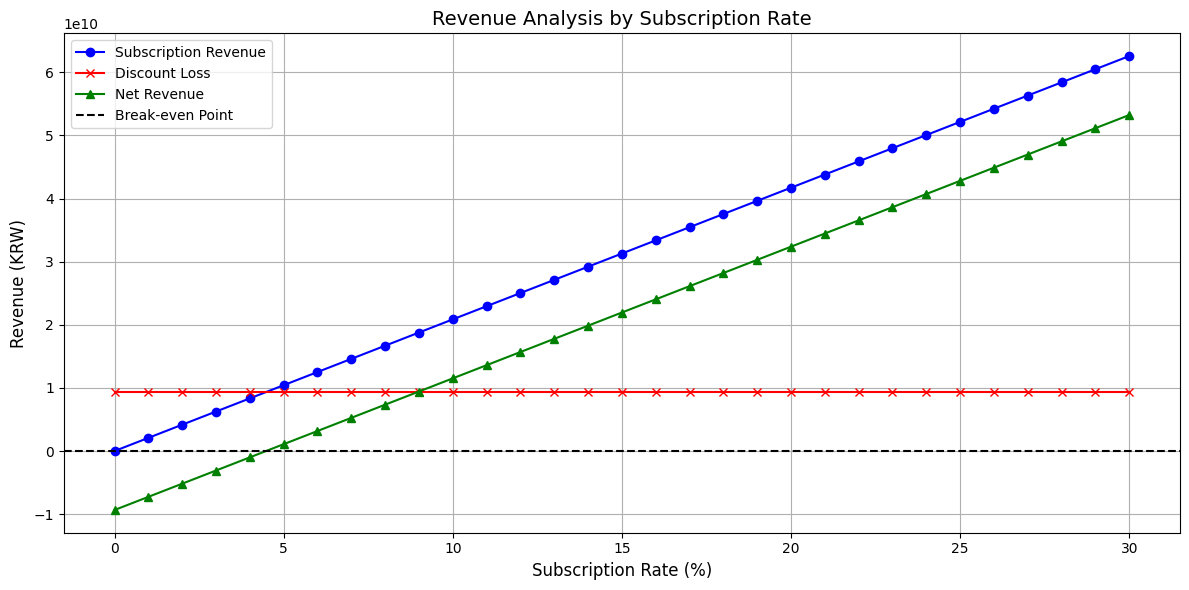

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(conversion_rate_df['구독률'] * 100, conversion_rate_df['구독 수익'], label='Subscription Revenue', marker='o', color='blue')
plt.plot(conversion_rate_df['구독률'] * 100, conversion_rate_df['할인 손실'], label='Discount Loss', marker='x', color='red')
plt.plot(conversion_rate_df['구독률'] * 100, conversion_rate_df['실제 수익'], label='Net Revenue', marker='^', color='green')
plt.axhline(0, color='black', linestyle='--', label='Break-even Point')

plt.title('Revenue Analysis by Subscription Rate', fontsize=14)
plt.xlabel('Subscription Rate (%)', fontsize=12)
plt.ylabel('Revenue (KRW)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
conversion_rate_df

,구독률,구독 수익,할인 손실,실제 수익
0,0.00,0,9344784946,-9344784946
1,0.01,2086202658,9344784946,-7258582287
2,0.02,4172405317,9344784946,-5172379628
3,0.03,6258607976,9344784946,-3086176970
4,0.04,8344810634,9344784946,-999974311
5,0.05,10431013293,9344784946,1086228347
6,0.06,12517215952,9344784946,3172431005
7,0.07,14603418610,9344784946,5258633664
8,0.08,16689621269,9344784946,7344836323
9,0.09,18775823928,9344784946,9431038981


In [44]:
df1.head()

,고객ID,최초거래년월,최초가맹점업종명,최초거래년월승인건수,최초거래년월승인금액,두번째거래년월,세번째거래년월,네번째거래년월,고객별활동개월수,거래 월 리스트,연속 거래 구간,활성화,거래 연속성 점수,신유지,연속구간,거래월점수,연속구간점수,월평균 거래금액,총거래금액,Cluster
0,2493916545,202212,"편 의 점,일반서적,사우나,서양음식,일반한식",12.5,80000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,684615.38,8900000,3
1,2494188975,202212,서양음식,2.5,10000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,226153.85,2940000,3
2,2494213057,202212,일반한식,2.5,10000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,220769.23,2870000,3
3,2495273114,202212,인터넷P/G,2.5,10000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,648461.54,8430000,3
4,2496557093,202212,정장,2.5,70000,202301,202302,202303,13,"[202212, 202301, 202302, 202303, 202304, 20230...","[(202212, 202212), (202301, 202312)]",202212,3.366111,202212,"[('202212', '202312')]",253.15,3.320117,170000.00,2210000,3


구독률에 따른 구독 수익, 할인 손실, 실제 수익:
      구독률  구독 수익      할인 손실      실제 수익
0     0.0      0          0          0
1    10.0      0   22920318  -22920318
2    20.0      0   45840637  -45840637
3    30.0      0   68760956  -68760956
4    40.0      0   91681275  -91681275
5    50.0      0  114601594 -114601594
6    60.0      0  137521913 -137521913
7    70.0      0  160442232 -160442232
8    80.0      0  183362551 -183362551
9    90.0      0  206282870 -206282870
10  100.0      0  229203189 -229203189


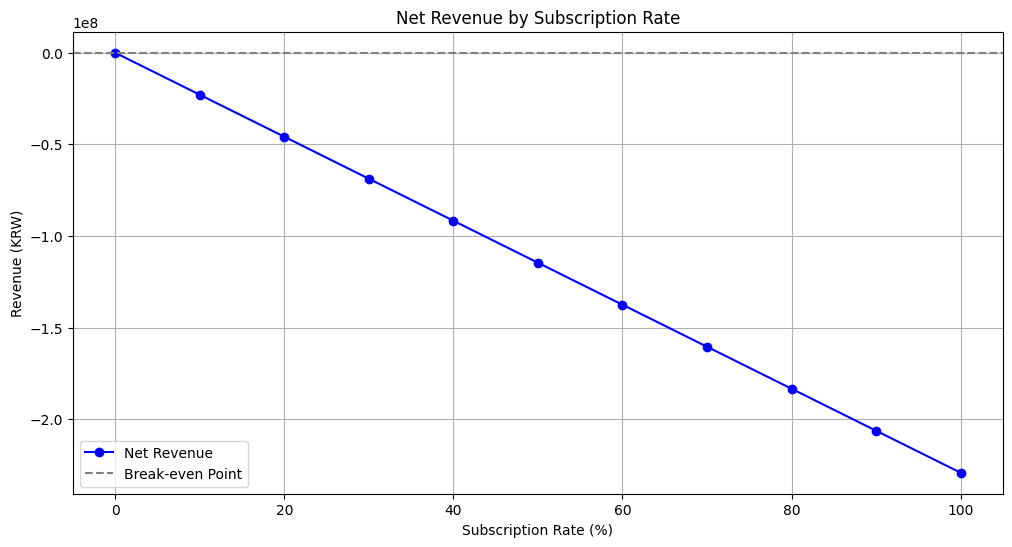

In [65]:
fixed_subscription_price = 0  
fixed_discount_rate = 0.0078 

monthly_avg_revenue = df1['월평균 거래금액'].mean()

num_customers = df1['고객ID'].nunique()

conversion_rate_range = np.linspace(0, 1.0, 11)

results = []

for conversion_rate in conversion_rate_range:
    subscribed_customers = num_customers * conversion_rate
    subscription_revenue = subscribed_customers * fixed_subscription_price
    total_discount_loss = monthly_avg_revenue * fixed_discount_rate * subscribed_customers
    actual_revenue = subscription_revenue - total_discount_loss
    results.append({
        '구독률': conversion_rate * 100, 
        '구독 수익': subscription_revenue,
        '할인 손실': total_discount_loss,
        '실제 수익': actual_revenue
    })

results_df = pd.DataFrame(results)
results_df[['구독 수익', '할인 손실', '실제 수익']] = results_df[['구독 수익', '할인 손실', '실제 수익']].astype(int)
print("구독률에 따른 구독 수익, 할인 손실, 실제 수익:")
print(results_df)

plt.figure(figsize=(12, 6))
plt.plot(results_df['구독률'], results_df['실제 수익'], marker='o', label='Net Revenue', color='blue')
plt.axhline(0, color='gray', linestyle='--', label='Break-even Point')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Revenue (KRW)')
plt.title('Net Revenue by Subscription Rate')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
results_df

,구독률,구독 수익,할인 손실,실제 수익
0,0.0,0,0,0
1,10.0,0,22920318,-22920318
2,20.0,0,45840637,-45840637
3,30.0,0,68760956,-68760956
4,40.0,0,91681275,-91681275
5,50.0,0,114601594,-114601594
6,60.0,0,137521913,-137521913
7,70.0,0,160442232,-160442232
8,80.0,0,183362551,-183362551
9,90.0,0,206282870,-206282870


구독률에 따른 구독 수익, 할인 손실, 실제 수익:
    구독률      구독 수익     할인 손실      실제 수익
0  10.0   60503923  22920318   37583604
1  15.0   90755884  34380478   56375406
2  20.0  121007846  45840637   75167208
3  25.0  151259807  57300797   93959010
4  30.0  181511769  68760956  112750812


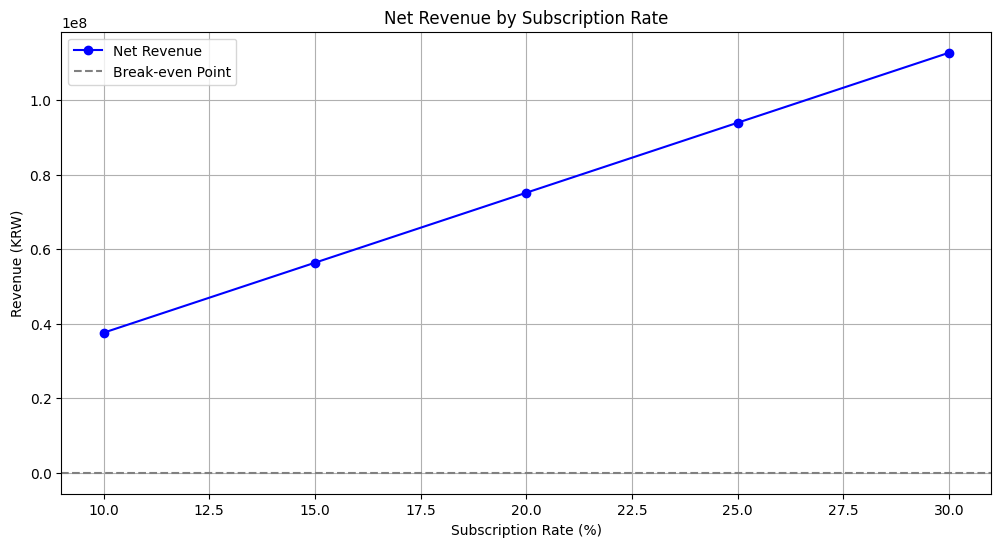

In [61]:
fixed_subscription_price = 7855 
fixed_discount_rate = 0.0078 
monthly_avg_revenue = df1['월평균 거래금액'].mean()
num_customers = df1['고객ID'].nunique()
conversion_rate_range = np.linspace(0.1, 0.3, 5)

results = []

for conversion_rate in conversion_rate_range:
    subscribed_customers = num_customers * conversion_rate
    subscription_revenue = subscribed_customers * fixed_subscription_price
    total_discount_loss = monthly_avg_revenue * fixed_discount_rate * subscribed_customers
    actual_revenue = subscription_revenue - total_discount_loss
    results.append({
        '구독률': conversion_rate * 100, 
        '구독 수익': subscription_revenue,
        '할인 손실': total_discount_loss,
        '실제 수익': actual_revenue
    })
results_df = pd.DataFrame(results)
results_df[['구독 수익', '할인 손실', '실제 수익']] = results_df[['구독 수익', '할인 손실', '실제 수익']].astype(int)
print("구독률에 따른 구독 수익, 할인 손실, 실제 수익:")
print(results_df)

plt.figure(figsize=(12, 6))
plt.plot(results_df['구독률'], results_df['실제 수익'], marker='o', label='Net Revenue', color='blue')
plt.axhline(0, color='gray', linestyle='--', label='Break-even Point')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Revenue (KRW)')
plt.title('Net Revenue by Subscription Rate')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
results_df

,구독률,구독 수익,할인 손실,실제 수익
0,10.0,60503923,22920318,37583604
1,15.0,90755884,34380478,56375406
2,20.0,121007846,45840637,75167208
3,25.0,151259807,57300797,93959010
4,30.0,181511769,68760956,112750812


In [63]:
target_revenue = 229203189 
results_df['목표 달성 월'] = (target_revenue / results_df['실제 수익']).apply(np.ceil)
print("구독률별 목표 수익을 초과하는 데 필요한 월 수:")
print(results_df)

구독률별 목표 수익을 초과하는 데 필요한 월 수:
    구독률      구독 수익     할인 손실      실제 수익  목표 달성 월
0  10.0   60503923  22920318   37583604      7.0
1  15.0   90755884  34380478   56375406      5.0
2  20.0  121007846  45840637   75167208      4.0
3  25.0  151259807  57300797   93959010      3.0
4  30.0  181511769  68760956  112750812      3.0


In [64]:
results_df

,구독률,구독 수익,할인 손실,실제 수익,목표 달성 월
0,10.0,60503923,22920318,37583604,7.0
1,15.0,90755884,34380478,56375406,5.0
2,20.0,121007846,45840637,75167208,4.0
3,25.0,151259807,57300797,93959010,3.0
4,30.0,181511769,68760956,112750812,3.0
